In [8]:
# Preamble
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from VeloceReduction.utils import polynomial_function

In [51]:
def get_wavelength_coeffs_from_vdarc():
    
    wavelength_coeffs = dict()
    with open('../vdarc_azzurro_230915.txt') as fp:
        line = fp.readline()
        cnt = 0
        while line:
            if line[:5] == 'START':
                order = int(line[6:-1])
            if line[:6] == 'COEFFS':
                wavelength_coeffs['ccd_1_order_'+str(order)] = np.array([float(coeff) for coeff in line[7:-1].split(' ')])
            line = fp.readline()
            cnt += 1

    with open('../vdarc_verde_230920.txt') as fp:
        line = fp.readline()
        cnt = 0
        while line:
            if line[:5] == 'START':
                order = int(line[6:-1])
            if line[:6] == 'COEFFS':
                wavelength_coeffs['ccd_2_order_'+str(order)] = np.array([float(coeff) for coeff in line[7:-1].split(' ')])
            line = fp.readline()
            cnt += 1

    with open('../vdarc_rosso_230919.txt') as fp:
        line = fp.readline()
        cnt = 0
        while line:
            if line[:5] == 'START':
                order = int(line[6:-1])
            if line[:6] == 'COEFFS':
                wavelength_coeffs['ccd_3_order_'+str(order)] = np.array([float(coeff) for coeff in line[7:-1].split(' ')])
            line = fp.readline()
            cnt += 1
    return(wavelength_coeffs)

wavelength_vacuum_coefficients_tinney = get_wavelength_coeffs_from_vdarc()

In [741]:
# Plot New vs. Tinney
def plot_new_vs_tinney(order_name, reference_pixel_tinney = 2450, shift_tinney = 0):
    
    tinney_order = order_name
    if shift_tinney != 0:
        tinney_order = order_name[:-3]+str(int(order_name[-3:])+shift_tinney)
    
    print(np.arange(0,4128,250))
    print(polynomial_function(np.arange(0,4128,250)-reference_pixel_tinney,*wavelength_vacuum_coefficients_tinney[tinney_order]))

    thxe_pixels_and_wavelengths = np.array(np.loadtxt('./'+order_name+'_px_wl.txt'))
    wavelength_solution_vacuum_coefficients, x = curve_fit(polynomial_function,
        thxe_pixels_and_wavelengths[:,0] - 2064,
        thxe_pixels_and_wavelengths[:,1],
        p0 = [np.median(thxe_pixels_and_wavelengths[:,1]), 0.05, 0.0, 0.0, 0.0]
    )

    f, gs = plt.subplots(2,1,figsize=(15,15))

    ax = gs[0]
    ax.scatter(
        thxe_pixels_and_wavelengths[:,0],
        10*thxe_pixels_and_wavelengths[:,1] - 10*polynomial_function(thxe_pixels_and_wavelengths[:,0]-2064,*wavelength_solution_vacuum_coefficients)
    )
    ax.plot(
        np.linspace(0,4128,100),
        10*(polynomial_function(np.linspace(0,4128,100)-2064,*wavelength_solution_vacuum_coefficients) - 
        polynomial_function(np.linspace(0,4128,100)-reference_pixel_tinney,*wavelength_vacuum_coefficients_tinney[tinney_order]))
    )
    ax.set_xlabel('Pixels')
    ax.set_ylabel('Difference Wavelength / Å')
    
    ax=gs[1]
    ax.scatter(
        thxe_pixels_and_wavelengths[:,0],
        10*thxe_pixels_and_wavelengths[:,1]
    )
    ax.plot(
        np.linspace(0,4128,100),
        10*polynomial_function(np.linspace(0,4128,100)-2064,*wavelength_solution_vacuum_coefficients)
    )
    ax.plot(
        np.linspace(0,4128,100),
        10*polynomial_function(np.linspace(0,4128,100)-reference_pixel_tinney,*wavelength_vacuum_coefficients_tinney[tinney_order])
    )
    ax.set_xlabel('Pixels')
    ax.set_ylabel('Wavelength / Å')

    plt.tight_layout()
    plt.show()
    plt.close

[   0  250  500  750 1000 1250 1500 1750 2000 2250 2500 2750 3000 3250
 3500 3750 4000]
[702.91330162 704.27609993 705.58059023 706.83087915 708.03040554
 709.18200592 710.28798    711.35015621 712.36995713 713.34846508
 714.28648754 715.18462274 716.04332506 716.86297062 717.64392275
 718.38659748 719.09152904]


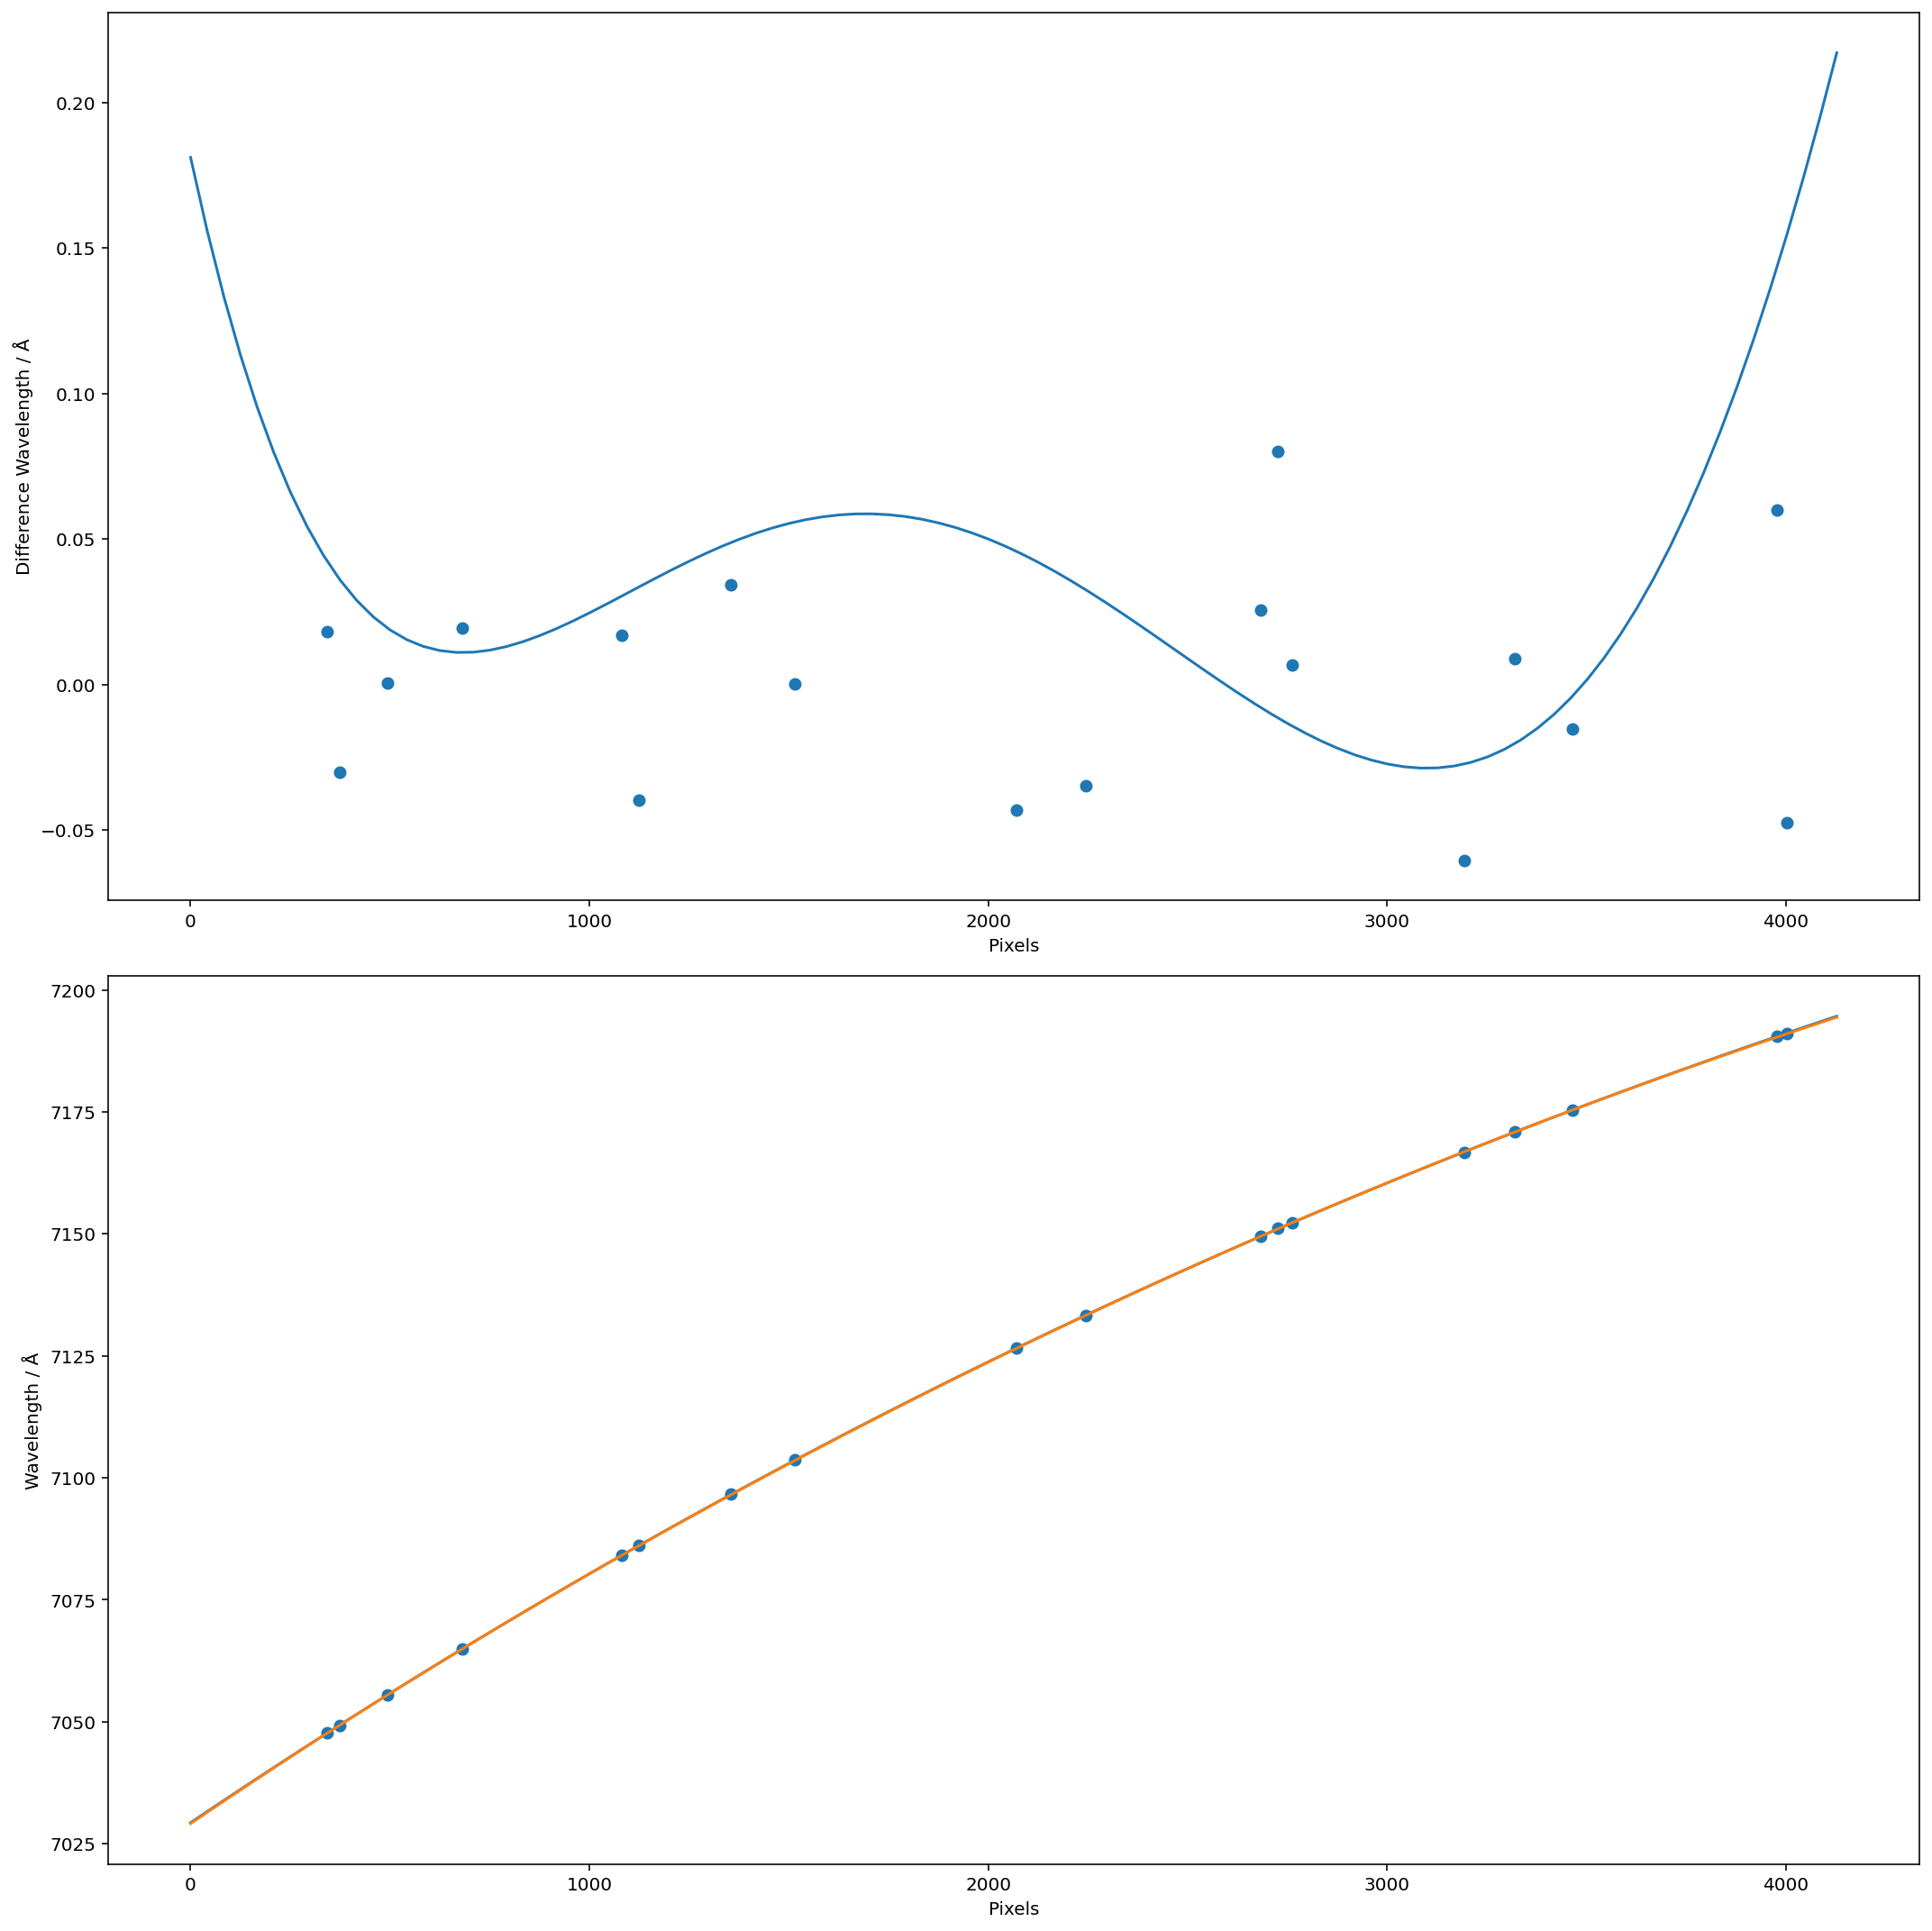

In [781]:
plot_new_vs_tinney(order_name = 'ccd_3_order_86', reference_pixel_tinney=2452, shift_tinney=0)